In [441]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re
import json

In [442]:
with open('li2.json','r') as fp:
    li2 = json.load(fp)

In [443]:
#li2 is tokenized and cleaned version of words of the sentences

In [444]:
li2[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [445]:
oo = pd.DataFrame(li2)
df = pd.read_csv('data/tweet_emotions.csv')
oo['emotion']=df['sentiment']
oo

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,[name],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,neutral
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [446]:
# droping the duplicates
oon = oo.drop_duplicates()
oon

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,empty
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,sadness
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,sadness
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,enthusiasm
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,happiness
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,love
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,day!,None,None,None,None,None,None,None,None,love
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,happiness


In [447]:
ool = oon.iloc[:,:-1]
ool

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,[name],i,know,i,was,listenin,to,bad,habit,earlier,...,None,None,None,None,None,None,None,None,None,None
1,Layin,n,bed,with,a,headache,ugh,waitin,on,your,...,None,None,None,None,None,None,None,None,None,None
2,Funeral,ceremony,glomy,friday,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,wants,to,hang,out,with,friends,SON!,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,[name],We,want,to,trade,with,someone,who,has,Houston,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,Sucesfuly,folowing,Tayla!,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39996,Hapy,Mothers,Day,Al,my,love,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
39997,Hapy,Mother's,Day,to,al,the,momies,out,"there,",be,...,your,day!,None,None,None,None,None,None,None,None
39998,[name],WASUP,BEAUTIFUL!,FOLOW,ME!,PEP,OUT,MY,NEW,HIT,...,None,None,None,None,None,None,None,None,None,None


In [448]:
v = ool.values
v

array([['[name]', 'i', 'know', ..., None, None, None],
       ['Layin', 'n', 'bed', ..., None, None, None],
       ['Funeral', 'ceremony', 'glomy', ..., None, None, None],
       ...,
       ['Hapy', "Mother's", 'Day', ..., None, None, None],
       ['[name]', 'WASUP', 'BEAUTIFUL!', ..., None, None, None],
       ['[name]', 'bulet', 'train', ..., None, None, None]], dtype=object)

In [449]:
vo =[]
for i in range(len(v)):
    vo.append((v[i][v[i]!=None]).tolist())

In [450]:
vo[0]

['[name]',
 'i',
 'know',
 'i',
 'was',
 'listenin',
 'to',
 'bad',
 'habit',
 'earlier',
 'and',
 'i',
 'started',
 'freakin',
 'at',
 'his',
 'part']

In [451]:
seql = pd.Series([len(x) for x in vo])

In [452]:
quant = seql.quantile([0.25,0.5,0.95])
quant

0.25     7.0
0.50    12.0
0.95    25.0
dtype: float64

In [453]:
# as we can the 95% of sequence lengths falls under 25, but max length is 33
# padding all the lengths to 33 will lead to redundancy 
# but padding only to the 25 lenth and truncating remaining tokens will also lead to loss of data

### padding the sequences

In [454]:
max_size = max(len(x) for x in vo)
padded_sequences = [x + ['<null>']* (max_size-len(x)) for x in vo]

In [455]:
max_size

33

In [456]:
#padded_sequences.shape
len(padded_sequences)

39626

In [457]:
x = padded_sequences
y = oon['emotion']

In [458]:
len(x)

39626

In [459]:
# unique_data, indices, counts = np.unique(x, axis=0, return_counts=True, return_index=True) # getting the unique data and it's indices

In [460]:
#len(indices)

In [461]:
# finding duplicate indices
"""
d_ind = []
for i in range(len(x)):
    if i not in indices:
        d_ind.append(i)
len(d_ind)
"""

'\nd_ind = []\nfor i in range(len(x)):\n    if i not in indices:\n        d_ind.append(i)\nlen(d_ind)\n'

In [462]:
#yy = y.drop(d_ind)
#len(yy)

In [463]:
unique_class = y.unique()
num_classes=len(unique_class)
num_classes

13

In [464]:
unique_class

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [465]:
xx = np.array(x)
yy = y.values

In [466]:
xx.shape,yy.shape

((39626, 33), (39626,))

In [467]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_int = le.fit_transform(yy)
y_int

array([ 2, 10, 10, ...,  7,  5,  7])

In [468]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xx,y_int,test_size=0.4,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(23775, 33) (23775,)
(15851, 33) (15851,)


In [469]:
x_train[0],unique_class[y_train[0]]

(array(['[name]', 'Sometimes', 'I', 'wish', 'Twiter', 'had', "Facebok's",
        'quotlikequot', 'just', 'so', 'I', 'could', 'give', 'you', 'a',
        'thumbs', 'up', 'Great', 'job', 'either', 'way', 'I', 'suck', 'to',
        'btw', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>',
        '<null>', '<null>'], dtype='<U53'),
 'fun')

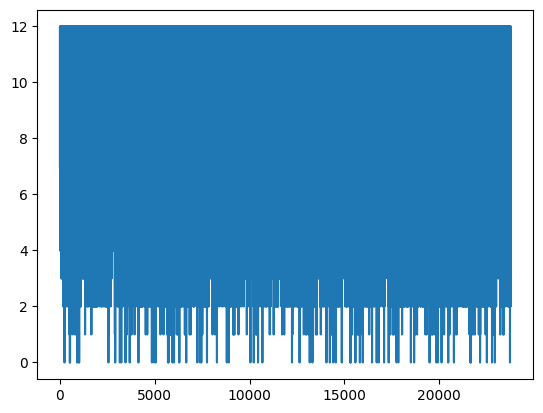

In [470]:
plt.plot(y_train)

In [471]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=42)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape) 

(7925, 33) (7925,)
(7926, 33) (7926,)


### Hybrid sampling

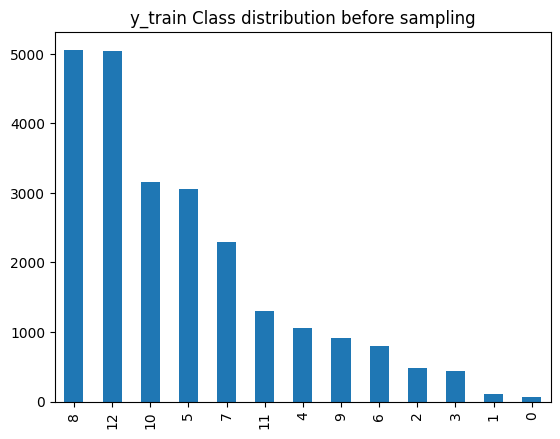

In [472]:
class_dist = pd.Series(y_train).value_counts()
class_dist.plot(kind='bar')
plt.title("y_train Class distribution before sampling")
plt.show()

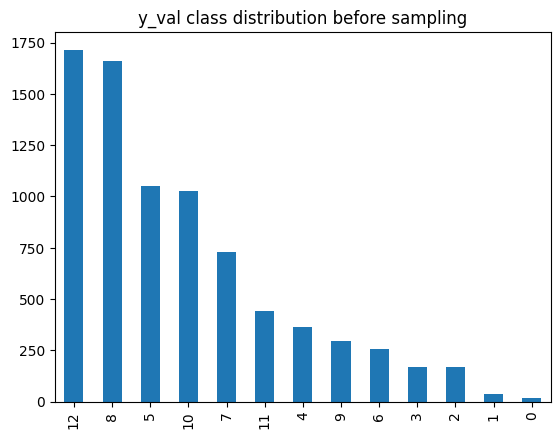

In [473]:
class_y = pd.Series(y_val).value_counts()
class_y.plot(kind='bar')
plt.title("y_val class distribution before sampling")
plt.show()

In [474]:
freq = pd.Series(y_train).value_counts()
freq

8     5060
12    5039
10    3149
5     3059
7     2296
11    1299
4     1051
9      920
6      801
2      487
3      442
1      103
0       69
Name: count, dtype: int64

In [475]:
freq1 = {}
freq2 = {}
for i,j in enumerate(freq):
    if(j<200):
        freq1[freq.index[i]]=800
    elif(j>200 and j<1000):
        freq1[freq.index[i]]=1000
    elif(j>3149):
        freq2[freq.index[i]]=3149
freq1,freq2

({9: 1000, 6: 1000, 2: 1000, 3: 1000, 1: 800, 0: 800}, {8: 3149, 12: 3149})

In [476]:
freq0 = pd.Series(y_val).value_counts()
freq0

12    1716
8     1662
5     1051
10    1024
7      727
11     442
4      365
9      296
6      258
3      166
2      166
1       36
0       16
Name: count, dtype: int64

In [477]:
freq11 = {}
freq22 = {}
for i,j in enumerate(freq0):
    if(j<300):
        freq11[freq0.index[i]]=300
    elif(j>1051):
        freq22[freq0.index[i]]=1051
freq11,freq22

({9: 300, 6: 300, 3: 300, 2: 300, 1: 300, 0: 300}, {12: 1051, 8: 1051})

In [478]:
# there are many ways to balance the classes, 
# 1) as there is high imbalance in our data, we will try class_weights and check whether it is yielding good results
# 2) oversampling using smote and undersampling using randomsampler

In [479]:
"""
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
"""

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced',classes=np.unique(y_train), y=y_train)\nclass_weights = dict(enumerate(class_weights))\n"

In [480]:
#oversampling using smote or Randomundersampler
#from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=freq1, random_state=42)
X_res, y_res = oversample.fit_resample(x_train, y_train)

oversample1 = RandomOverSampler(sampling_strategy=freq11, random_state=42)
X_val, y_val = oversample1.fit_resample(x_val,y_val) 

In [481]:
# Note: Don't use smote for generating data for sensual data like tokenized words, because generating synthetic data could be non-sensical 

In [482]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=freq2,random_state=42)
X_train_resampled, y_train_resampled = undersample.fit_resample(X_res, y_res)

undersample1 = RandomUnderSampler(sampling_strategy=freq22,random_state=42)
X_val_resampled, y_val_resampled = undersample1.fit_resample(X_val, y_val) 

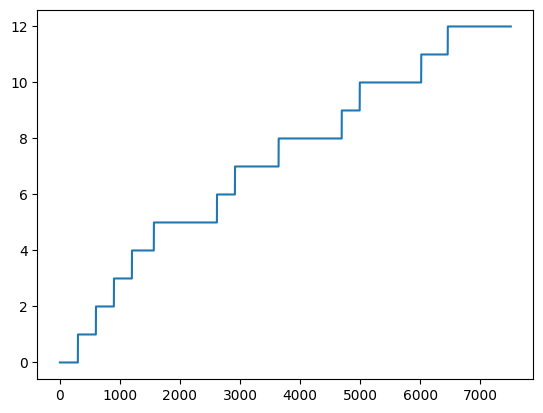

In [483]:
plt.plot(y_val_resampled)

In [484]:
from sklearn.utils import shuffle
X_train_resampled, y_train_resampled = shuffle(X_train_resampled,y_train_resampled,random_state=42)
X_val_resampled, y_val_resampled = shuffle(X_val_resampled, y_val_resampled,random_state=42)

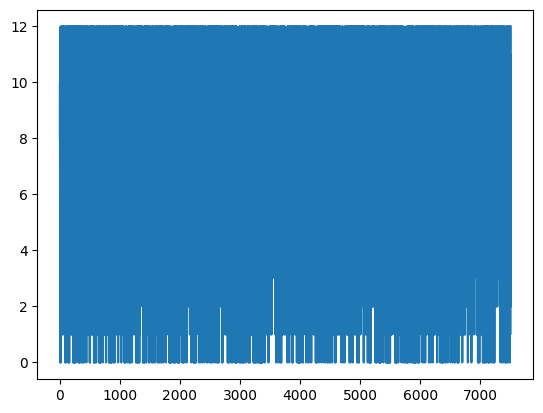

In [485]:
plt.plot(y_val_resampled)

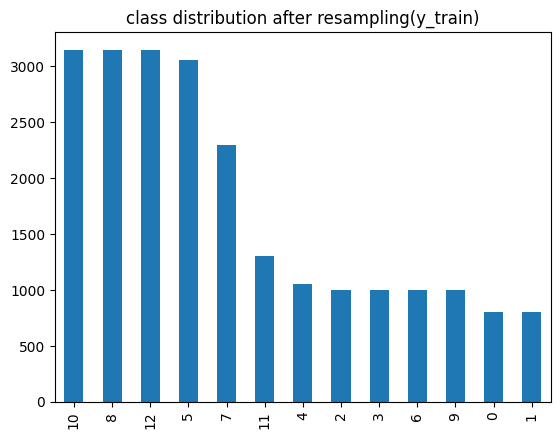

In [486]:
class_dist = pd.Series(y_train_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_train)")
plt.show()

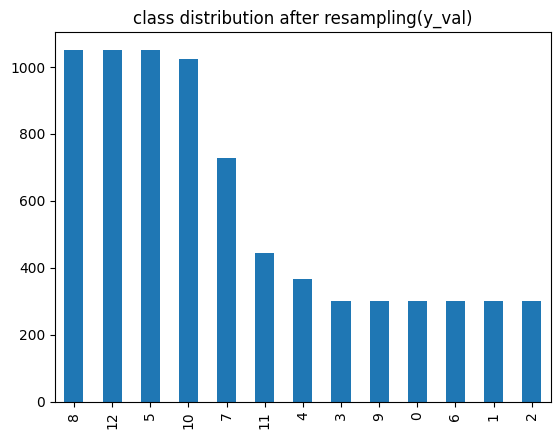

In [487]:
class_dist = pd.Series(y_val_resampled).value_counts()
class_dist.plot(kind='bar')
plt.title("class distribution after resampling(y_val)")
plt.show()

In [488]:
# largesample/samplesample = k
# if k>5, high imbalance
# if k<5, mild imbalance

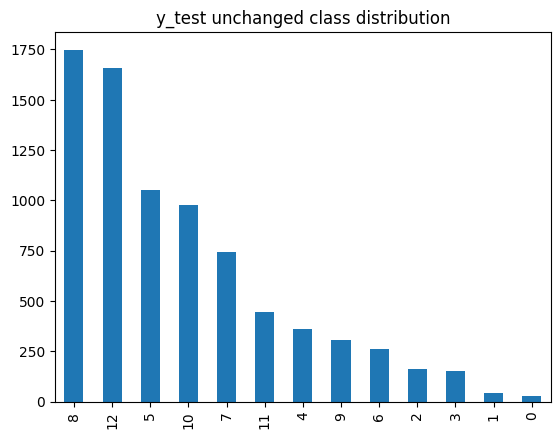

In [489]:
class_dist = pd.Series(y_test).value_counts()
class_dist.plot(kind='bar')
plt.title("y_test unchanged class distribution")
plt.show()

In [490]:
#Note: Generating more random samples may lead to overfitting

In [491]:
x_train.shape,X_train_resampled.shape # we observe there is an decrease or increase in the sample

((23775, 33), (22752, 33))

In [492]:
x_val.shape,X_val_resampled.shape # we observe there is an decrease or increase in the sample

((7925, 33), (7511, 33))

In [493]:
#Note: Oversampling more will lead to redundancy in the data which may leads to overfitting
# Becautious

In [494]:
#len(X_train_resampled)-len(np.unique(X_train_resampled,axis=0)),len(X_val_resampled)-len(np.unique(X_val_resampled,axis=0))
# this indicates there are duplicates in the array

In [495]:
df_train = pd.DataFrame(X_train_resampled)
df_train['emotion']=y_train_resampled
df_train 

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,Sometimes,the,things,you,say,hurt,the,ones,you,love,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
1,[name],haha!,you're,so,"funy,",Mike,you're,probably,the,only,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,uploading,photos,on,"Facebok,",amp,Friendster,Myspace,later,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
3,FINALY,FINISHED,MY,FUCKING,FILM,FINAL!,"Wel,",al,except,1,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
4,joe,2,30pm,Kevin,pics,up,a,new,pair,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22747,Voluntering,at,Down,Syndrome,Indiana,on,Wednesday,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22748,[name],a,day,for,you,then!,I,have,to,get,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
22749,[name],Thanks,your,my,first,lol,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5
22750,is,boiling,in,the,"ofice,",air,con,any1,?,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [496]:
df_traino = df_train.drop_duplicates()
df_traino

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,Sometimes,the,things,you,say,hurt,the,ones,you,love,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
1,[name],haha!,you're,so,"funy,",Mike,you're,probably,the,only,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,uploading,photos,on,"Facebok,",amp,Friendster,Myspace,later,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
3,FINALY,FINISHED,MY,FUCKING,FILM,FINAL!,"Wel,",al,except,1,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
4,joe,2,30pm,Kevin,pics,up,a,new,pair,of,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22746,[name],Wel,who,can,argue,with,Gibs,and,win?,p,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22747,Voluntering,at,Down,Syndrome,Indiana,on,Wednesday,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
22748,[name],a,day,for,you,then!,I,have,to,get,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,12
22749,[name],Thanks,your,my,first,lol,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,5


In [497]:
df_val = pd.DataFrame(X_val_resampled)
df_val['emotion']=y_val_resampled
df_val

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7509,I,forgot,to,complain,about,Southwest,not,doing,preboard,for,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2


In [498]:
df_valo = df_val.drop_duplicates()
df_valo

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
0,[name],i,wish,i,was,home,in,bed,naked,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
1,[name],bye,selena!,to,bad,i,didnt,get,to,talk,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
2,[name],fine!,Going,to,do,my,big,walk,today,20,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
3,[name],Where,are,you,at,the,mo,Becks?,Guesing,it's,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
4,[name],thanks,for,viewing,my,portfolio,I'l,be,updating,it,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,"Wel,",there,goes,that,shirt,Haha,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,8
7506,SEe,waT,I,Mean,bOuT,FoL0w,fRiDaYs,It'S,cALed,LoSe,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7507,didnt,enjoy,having,to,say,godbye,to,"alex,",v,emotional,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10
7508,Is,anyone,else,having,a,bad,Friday?,Is,not,a,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,10


In [499]:
indexo = list(df_traino.index)
indexa = list(df_train.index)
indexd = []
for i in indexa:
    if(i not in indexo):
        indexd.append(i)

indexov = list(df_valo.index)
indexav = list(df_val.index)
indexdv = []
for i in indexav:
    if(i not in indexov):
        indexdv.append(i)

In [500]:
len(indexd),len(indexdv)

(2778, 862)

In [501]:
df_traind = df_train.iloc[indexd]
df_traind

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
505,Internet,is,painfuly,slow,today,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
508,[name],Why,do,you,not,respond,me?,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
515,Gah!,I,left,my,glases,at,work,and,reading,is,...,Old,age,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
591,[name],hey,"divshite,",phone,is,playing,soft,arses,again,x,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
606,Have,I,mentioned,this,bus,was,slow?,on,it,for,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22726,Never,before,in,the,field,of,human,conflict,have,so,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,6
22734,At,the,park!,Its,raining!,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2
22735,[name],"yes,",bo,for,soar,throats,and,earaches!,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
22736,Curse,you,breakfast,gods,ful,bowl,of,cereal,not,enough,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,2


In [502]:
df_traind.value_counts()

0           1       2           3      4        5         6         7         8       9       10      11        12      13        14            15       16      17      18        19      20      21       22      23      24      25      26      27      28      29      30      31      32      emotion
quotlocked  up      abroadquot  makes  bein     half      brown     god       risk    mgmt    when    travelin  3rd     world     i             blend    i       fel     sory      for     my      hostage  magnet  white   pepo    <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          21
[name]      [name]  your        not    talking  about     your      obsesion  with    me      right?  <null>    <null>  <null>    <null>        <null>   <null>  <null>  <null>    <null>  <null>  <null>   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          19
            jet     lag         must   be       so        anoying!  im        in      uk

In [503]:
df_vald = df_val.iloc[indexdv]
df_vald

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,emotion
61,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
139,listening,to,faith,spirituality,and,the,internet,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
156,[name],Murphy's,Law?,Sory,that,your,computer,is,not,coperating,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
193,[name],bo,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1
227,someone,WOULD,give,a,spech,about,loved,ones,in,the,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,Ian,is,waiting,for,a,very,important,pic,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,3
7490,[name],I,have,a,2nd,monitor,I,could,use,but,...,have,the,"rom,",sure,hope,so!,<null>,<null>,<null>,2
7493,[name],Every,time,I,suced,with,a,"code,",I,get,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,0
7501,[name],thats,another,sponsor,<null>,<null>,<null>,<null>,<null>,<null>,...,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,<null>,1


In [504]:
df_vald.value_counts()

0       1         2         3           4       5       6          7         8       9           10         11      12      13      14       15      16      17        18      19      20          21      22      23      24      25      26      27      28      29      30      31      32      emotion
[name]  Murphy's  Law?      Sory        that    your    computer   is        not     coperating  when       you     have    lots    of       work    My      kids      are     <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          29
        smh       Your      whin        with    that    coment     <null>    <null>  <null>      <null>     <null>  <null>  <null>  <null>   <null>  <null>  <null>    <null>  <null>  <null>      <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  0          23
        Every     time      I           suced   with    a          code,     I       get   

In [505]:
# now we found duplicate data from the resampled data
# And we will be applying augumentation techniques to it, to maintain the variability in the data

In [506]:
X_train_resampled_dup = df_traind.iloc[:,:-1].values.tolist()
y_train_resampled_dup = df_traind.iloc[:,-1]
X_val_resampled_dup = df_vald.iloc[:,:-1].values.tolist()
y_val_resampled_dup = df_vald.iloc[:,-1]

In [507]:
# leave them as numpy array
X_train_resampled_o = df_traino.iloc[:,:-1]
y_train_resampled_o = df_traino.iloc[:,-1]
X_val_resampled_o = df_valo.iloc[:,:-1]
y_val_resampled_o = df_valo.iloc[:,-1]

In [508]:
print(len(X_train_resampled_o),"+",len(X_train_resampled_dup),len(X_train_resampled))
print(len(y_train_resampled_o),"+",len(y_train_resampled_dup),len(y_train_resampled))
print(len(X_val_resampled_o),"+",len(X_val_resampled_dup),len(X_val_resampled))
print(len(y_val_resampled_o),"+",len(y_val_resampled_dup),len(y_val_resampled))

19974 + 2778 22752
19974 + 2778 22752
6649 + 862 7511
6649 + 862 7511


In [509]:
# Now our data looks kinda balanced

# Note: the highest classes frequency shouldn't be more than 5 times more than the lowest class frequency, otherwise it is high imbalance, 
# >5 high imbalance,<5 moderate imbalance, <3 balance

In [510]:
# As we see there is lot of increase in the sample, as random samples increase the size the duplicating the data
# So, to mitigate it, we will do data agumentation like replacing the words with similar meaning word to increase the variablility in the data

### Data Agumentation (only for duplicate data)

In [511]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [512]:
from nltk.corpus import wordnet
import random
word = 'happy'
synonyms = wordnet.synsets(word)
synonyms

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

In [513]:
# Replacing the words with thier synonyms

In [514]:
from nltk.corpus import wordnet
import random


# method1 (manually replacing words using nltk)

exceptions = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As']
def augument(words):
    lii = []
    for word in words:
        li =[]
        synonyms = wordnet.synsets(word)
        if(len(synonyms)!=0 and word not in exceptions):
            for i in range(len(synonyms)):
                synonym = synonyms[i].lemmas()[0].name()
                if(synonym!=word):
                    li.append(synonym)
            if(len(li)!=0):
                lii.append(random.choice(li)) 
            else: lii.append(word)
        else:
            lii.append(word)
    return lii


"""
# method2 (using nlpaug library)
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger_eng')
#Initialize the augmenter for synonym replacement
stopwords = ['an','An','be','Be','in','In','am','Am','a','A','it','It','i','I','as','As','<null>','[name]']
synonym_aug = naw.SynonymAug(aug_src='wordnet',stopwords=stopwords)

def augument(words):
    str = " ".join(words)
    syn = synonym_aug.augment(str)
    return syn[0].split()
"""

x_train_augument = []
x_val_augument = []
for i in range(len(X_train_resampled_dup)):
    tempx = augument(X_train_resampled_dup[i])
    x_train_augument.append(tempx)
    
for i in range(len(X_val_resampled_dup)):
    tempxv = augument(X_val_resampled_dup[i])
    x_val_augument.append(tempxv)

In [515]:
len(x_train_augument),len(x_val_augument)

(2778, 862)

In [519]:
# Repeating synonymn replacement

x_train_augument1 = []
x_val_augument1 = []
for i in range(len(x_train_augument)):
    tempx = augument(x_train_augument[i])
    x_train_augument1.append(tempx)
    
for i in range(len(x_val_augument)):
    tempxv = augument(x_val_augument[i])
    x_val_augument1.append(tempxv)

In [244]:
"""
insertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path='bert-base-uncased',top_k=5,stopwords=stopwords)
sample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")
sample
"""

'\ninsertion_aug = naw.ContextualWordEmbsAug(action="insert",model_path=\'bert-base-uncased\',top_k=5,stopwords=stopwords)\nsample = insertion_aug.augment("i love eating mushrooms and samosas in theb ")\nsample\n'

In [245]:
"""
import re
import concurrent.futures
import nlpaug.augmenter.word as naw

# Define the augmentation and cleaning function
def augment_and_clean(sentence):
    augmented_sentence = insertion_aug.augment(" ".join(sentence))
    return func(augmented_sentence[0])[0].split()

def func(x):
    li = []
    x = re.sub(r'([?!.,])\1+', r'\1', x)
    x = re.sub(r'[^a-zA-Z0-9\s\!\?\,\@\']','',x)
    x = re.sub(r'\w*null | tested |\s*test| \s*non','',x)
    x = re.sub(r'\s*UNK',' [name]',x)
    li.append(x)
    return li

# List of sentences to augment
x_train_augument1 = []

# Run in parallel with a thread pool
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(augment_and_clean, x_train_augument))

x_train_augument1.extend(results)
"""

'\nimport re\nimport concurrent.futures\nimport nlpaug.augmenter.word as naw\n\n# Define the augmentation and cleaning function\ndef augment_and_clean(sentence):\n    augmented_sentence = insertion_aug.augment(" ".join(sentence))\n    return func(augmented_sentence[0])[0].split()\n\ndef func(x):\n    li = []\n    x = re.sub(r\'([?!.,])\x01+\', r\'\x01\', x)\n    x = re.sub(r\'[^a-zA-Z0-9\\s\\!\\?\\,\\@\']\',\'\',x)\n    x = re.sub(r\'\\w*null | tested |\\s*test| \\s*non\',\'\',x)\n    x = re.sub(r\'\\s*UNK\',\' [name]\',x)\n    li.append(x)\n    return li\n\n# List of sentences to augment\nx_train_augument1 = []\n\n# Run in parallel with a thread pool\nwith concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:\n    results = list(executor.map(augment_and_clean, x_train_augument))\n\nx_train_augument1.extend(results)\n'

In [ ]:
# swapping the words 

In [520]:
import nlpaug.augmenter.word as naw

def custom_tokenizer(text):
    # Merge contractions
    text = re.sub(r"(\w)'(\w)", r"\1'\2", text)
    text = re.sub(r'\[name]','[name]',text)
    tokens = text.split()
    return tokens
    
swap_aug = naw.RandomWordAug(action="swap",tokenizer=custom_tokenizer)
swap_aug.augment("i [name] love eating mushrooms and samosas in the beach and it's very hot ")

["i [name] love mushrooms eating samosas and in beach the and it's very hot"]

In [521]:
# swapping the words in the sentences for more variability

def swap(sentences):
    ll =[]
    for words in sentences:
        str=""
        for i,j in enumerate(words):
            if(i==0):
                str+=j
            else:
                if(j!='<null>'):
                    str+=" "+j
                else: break 
        ss=swap_aug.augment(str)
        ss = ss[0]
        ll.append(ss.split())
    return ll

x_train_augument1 = swap(x_train_augument1)
x_val_augument1 = swap(x_val_augument1)

In [522]:
# swapping agian 
x_train_augument1 = swap(x_train_augument1)
x_val_augument1= swap(x_val_augument1)

In [523]:
print(x_train_augument[100])

['astatine', 'schol', 'again', 'information_technology', 'bore', 'and', 'these', 'citizenry', 'be', 'acting', 'nation', 'and', 'it', 'fellate', '!XD', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [524]:
print(x_train_augument1[100])

['Schol', 'again', 'astatine', 'information_technology', 'behave', 'and', 'citizenry', 'these', 'be', 'act', 'and', 'state', '!XD', 'it', 'fellate']


In [525]:
print(x_val_augument[12])

['[name]', "Murphy's", 'Law?', 'Sory', 'that', 'your', 'calculator', 'constitute', 'not', 'coperating', 'when', 'you', 'take', 'lot', 'of', 'oeuvre', 'My', 'kid', 'be', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [526]:
print(x_val_augument1[12])

['[name]', 'that', 'Law?', "Murphy's", 'Sory', 'your', 'calculator', 'not', 'appoint', 'coperating', 'when', 'contain', 'you', 'of', 'draw', 'oeuvre', 'My', 'be', 'child']


In [527]:
x_train_augument1 = [i + ['<null>']*(len(x_train_augument[0])-len(i)) for i in x_train_augument1]
x_val_augument1 = [i + ['<null>']*(len(x_val_augument[0])-len(i)) for i in x_val_augument1]

In [ ]:
# reframing them to dataframe to see the value_counts

In [529]:
df_train_final = pd.DataFrame(x_train_augument1)
df_train_final['emotion'] = y_train_resampled_dup
df_val_final = pd.DataFrame(x_val_augument1)
df_val_final['emotion']=  y_val_resampled_dup

In [530]:
df_train_final.value_counts()

0        1         2              3          4               5              6             7           8           9               10      11        12         13           14           15          16      17      18         19      20      21      22      23      24      25      26      27      28      29      30      31      32      emotion
'Whats   your      point_of_view  along      mariage?'       Maine          cheery        'what       conclusion  sleep_together  the     natalie,  Maine      necessitate  these        questions!  as      travel  audacious  get     a       dad     job!'   <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  2.0        1
actualy  not       to             fudge      leverage        anything       the           from        denounce    insofar         ovi     eror      ceaseless  waiter       knocked_out  discipline  along   <null>  <null>     <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <null>  <nu

In [531]:
df_val_final.value_counts()

0                    1                2               3             4                     5             6             7              8                  9           10            11             12                      13           14         15              16         17         18         19         20         21            22              23                      24          25      26      27      28      29      30      31      32      emotion
And                  could            you             return        it                    my            al,           pudding_stone  of                 dirt!       I'm           aampe          in                      with         frezing    fuly            dad        I'm        else       tremor     Every1     fones         monetary_value  nobelium                alowed      ardent  fs!     <null>  <null>  <null>  <null>  <null>  <null>  0.0        1
[name]               colleague        You're          a             You                   hax0r

In [ ]:
# Now we can see that there are all unique values, no duplicacy is found in the data

In [538]:
# changing to numpy array
x_train_augumentf = np.array(x_train_augument1)
x_val_augumentf = np.array(x_val_augument1)

In [539]:
print(X_train_resampled_o.shape,x_train_augumentf.shape)
print(y_train_resampled_o.shape,y_train_resampled_dup.shape)
print(X_val_resampled_o.shape,x_val_augumentf.shape)
print(y_val_resampled_o.shape,y_val_resampled_dup.shape) 

(19974, 33) (2778, 33)
(19974,) (2778,)
(6649, 33) (862, 33)
(6649,) (862,)


In [540]:
X_train_resampled_m=np.vstack([X_train_resampled_o,x_train_augumentf])
y_train_resampled_m = np.hstack([y_train_resampled_o,y_train_resampled_dup])
X_val_resampled_m = np.vstack([X_val_resampled_o,x_val_augumentf])
y_val_resampled_m = np.hstack([y_val_resampled_o,y_val_resampled_dup])

In [541]:
y_train_resampled_m

array([10, 10,  2, ...,  0,  2,  1])

In [543]:
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(23775, 33) (23775,)
(7925, 33) (8787,)


In [542]:
print(X_train_resampled_m.shape,y_train_resampled_m.shape)
print(X_val_resampled_m.shape,y_val_resampled_m.shape)

(22752, 33) (22752,)
(7511, 33) (7511,)


In [544]:
def arraytolist(arr):
    li =[]
    for i in arr:
        li.append(list(i))
    return li

Xtl = arraytolist(X_train_resampled_m)
xvl = arraytolist(X_val_resampled_m)
xl = arraytolist(x_test)

In [545]:
z =[]
z.extend(Xtl)
z.extend(xvl)
z.extend(xl)
len(z)

38189

In [548]:
print(z[0])

['Sometimes', 'the', 'things', 'you', 'say', 'hurt', 'the', 'ones', 'you', 'love', 'most', 'unintentionaly', 'And', 'you', 'can', 'never', 'ever', 'take', 'it', 'back', 'or', 'fix', 'it', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [549]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(z)
encoded = tokenizer.texts_to_sequences(z)

In [550]:
print(encoded[0])

[593, 5, 285, 9, 176, 461, 5, 693, 9, 40, 375, 6845, 8, 9, 71, 151, 243, 167, 10, 61, 105, 1297, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [551]:
tokenizer.word_index.items()

dict_items([('<null>', 1), ('[name]', 2), ('i', 3), ('to', 4), ('the', 5), ('a', 6), ('my', 7), ('and', 8), ('you', 9), ('it', 10), ('of', 11), ('in', 12), ('for', 13), ('is', 14), ('so', 15), ('on', 16), ('be', 17), ('that', 18), ('have', 19), ('me', 20), ("i'm", 21), ('but', 22), ('with', 23), ('just', 24), ('not', 25), ('day', 26), ('at', 27), ('was', 28), ('this', 29), ('god', 30), ('al', 31), ('get', 32), ('out', 33), ('now', 34), ('your', 35), ("it's", 36), ('like', 37), ('up', 38), ('are', 39), ('love', 40), ('no', 41), ('go', 42), ('got', 43), ('do', 44), ('im', 45), ('going', 46), ('hapy', 47), ('from', 48), ('work', 49), ('lol', 50), ("don't", 51), ('what', 52), ('we', 53), ('realy', 54), ('today', 55), ('wil', 56), ('about', 57), ('am', 58), ('u', 59), ('one', 60), ('back', 61), ('time', 62), ('as', 63), ('when', 64), ('know', 65), ("can't", 66), ('if', 67), ('se', 68), ('its', 69), ('had', 70), ('can', 71), ('some', 72), ('how', 73), ('new', 74), ('there', 75), ('stil', 76)

In [552]:
vocab_size = len(tokenizer.word_index)+1
vocab_size # so, we have vocab_size unique words in our all combined sequence

37480

In [554]:
# after NER and augumentation, the number of unique words reduced from to 37480 , which significantly reduces overfitting of the model
# and good scope for generalization

### word vectors

In [555]:
# we will be using pretrained Glove to create word vectors for our sequences
# the file is downloaded locally, and we will find the corressponding word vector by mapping our words with it

In [556]:
# Load the GloVe embeddings
"""
import numpy as np
embedding_index = {}
embedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences

with open('D:/ds/dl/rnn/archive/glove.6B.100d.txt', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create the embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding matrix shape:", embedding_matrix.shape) 
"""

'\nimport numpy as np\nembedding_index = {}\nembedding_dim = 100  # Dimension of the GloVe embeddings, adjust based on the complexity of the task and no.of words,sentences\n\nwith open(\'D:/ds/dl/rnn/archive/glove.6B.100d.txt\', encoding="utf8") as f:\n    for line in f:\n        values = line.split()\n        word = values[0]\n        coefs = np.asarray(values[1:], dtype=\'float32\')\n        embedding_index[word] = coefs\n\n# Create the embedding matrix\nembedding_matrix = np.zeros((vocab_size, embedding_dim))\nfor word, i in tokenizer.word_index.items():\n    embedding_vector = embedding_index.get(word)\n    if embedding_vector is not None:\n        embedding_matrix[i] = embedding_vector\n\nprint("Embedding matrix shape:", embedding_matrix.shape) \n'

In [557]:
# we will be using word2vec to train on our custom words and generate word vectors
# because glove may not containa all the word vectors, where the words will be unique to our data 

In [558]:
print(z[5])

['God', 'Night,', 'Hapy', "Mother's", 'Day', '!', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>', '<null>']


In [559]:
from gensim.models import Word2Vec

# Initialize and train the Word2Vec model
# Here, `size` is the embedding dimension, and `window` is the context window size
model = Word2Vec(sentences=z, vector_size=200, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec.model")

In [560]:
#sample
model = Word2Vec.load("word2vec.model")
word_vector = model.wv["hi"]
word_vector

array([ 0.10322643, -0.09557775, -0.26670924, -0.09407746,  0.3456703 ,
        0.16186738, -0.16319756,  0.24302725, -0.00289546,  0.2402395 ,
       -0.3360368 , -0.10325467,  0.02280101,  0.11901135,  0.02040705,
       -0.19385974, -0.20050687,  0.07213441,  0.34762505,  0.03962684,
        0.02980693, -0.13175708, -0.05924721, -0.09505504, -0.04006256,
        0.10902051,  0.03529562, -0.2728139 , -0.0464009 ,  0.26457244,
        0.42729506, -0.01360193, -0.06516225,  0.07149545, -0.14161988,
        0.20899577, -0.11458657,  0.16915125, -0.06078548, -0.20340496,
        0.03014163, -0.1624824 ,  0.04858847,  0.11687345,  0.30122468,
        0.0648061 ,  0.09015293, -0.20778407,  0.1114934 , -0.14303891,
        0.34135506, -0.332961  , -0.21841168, -0.06006638, -0.17351173,
        0.02390234, -0.17431399,  0.07698917, -0.26715678, -0.33643636,
       -0.1201598 ,  0.04455886,  0.17211218,  0.26199654, -0.18223318,
        0.12225822, -0.07093965,  0.20395729, -0.29255438,  0.08

In [561]:
import random
embedding_matrix = np.zeros((vocab_size, 200))
model = Word2Vec.load("word2vec.model")
for i,ind in tokenizer.word_index.items():
    try:
        embedding_matrix[ind]=model.wv[i] 
    except:
        random_floats = [random.uniform(-3, 3) for i in range(200)]
        embedding_matrix[ind]=random_floats
embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.21094696e-01,  8.38688537e-02, -1.59507841e-01, ...,
        -4.25355345e-01,  1.07589173e+00, -1.15880108e+00],
       [ 4.12100479e-02, -6.11055136e-01, -7.71082163e-01, ...,
        -8.78933549e-01,  1.43556237e+00, -1.23797536e+00],
       ...,
       [-2.45939671e+00, -2.27179179e+00,  2.23910086e+00, ...,
        -2.47592411e+00, -1.60225555e+00,  1.98919651e+00],
       [-3.41539367e-01, -2.98372894e+00, -1.67241228e+00, ...,
        -2.10350539e+00, -2.16025448e+00,  1.82650973e+00],
       [-1.15662524e-02, -5.53020416e-03,  1.34556365e-04, ...,
         1.51579664e-03,  4.31170827e-03, -3.02545400e-03]])

In [562]:
embedding_matrix.shape

(37480, 200)

In [563]:
# the word vectors in embedded matrix are also stored in the same order as word_index 

In [564]:
len(encoded)

38189

In [565]:
l1= len(Xtl)
l2 = len(xvl)
l1,l2

(22752, 7511)

In [566]:
ll = l1+l2
ll

30263

In [567]:
ll-l2 

22752

In [568]:
len(encoded)-ll # y_test length

7926

In [569]:
x_train_final = encoded[:l1]
x_val_final = encoded[l1:ll]

In [570]:
x_train_final = np.array(x_train_final)
x_val_final = np.array(x_val_final)

In [571]:
from tensorflow.keras.utils import to_categorical
y_train_hot = to_categorical(y_train_resampled_m,num_classes=13)
y_test_hot = to_categorical(y_test,num_classes=13)
y_val_hot = to_categorical(y_val_resampled_m,num_classes=13)
y_train_hot.shape,y_val_hot.shape ,y_test_hot.shape

((22752, 13), (7511, 13), (7926, 13))

In [572]:
print(x_train_final.shape,y_train_hot.shape)
print(x_val_final.shape,y_val_hot.shape)
print(x_test.shape,y_test_hot.shape)

(22752, 33) (22752, 13)
(7511, 33) (7511, 13)
(7926, 33) (7926, 13)


In [573]:
x_train_final

array([[ 593,    5,  285, ...,    1,    1,    1],
       [   2,  946,  139, ...,    1,    1,    1],
       [1839,  982,   16, ...,    1,    1,    1],
       ...,
       [ 355,    2,  539, ...,    1,    1,    1],
       [   9, 5858, 1717, ...,    1,    1,    1],
       [  17,    5, 7211, ...,    1,    1,    1]])

In [574]:
# shuffle the data
from sklearn.utils import shuffle
x_train_final,y_train_hot = shuffle(x_train_final,y_train_hot,random_state=42)
x_val_final,y_val_hot = shuffle(x_val_final,y_val_hot,random_state=42)

In [575]:
x_train_final

array([[ 3028,    79,  4701, ...,     1,     1,     1],
       [  659,  8291,    21, ...,     1,     1,     1],
       [   27, 16706,    24, ...,     1,     1,     1],
       ...,
       [    2,   539,   355, ...,     1,     1,     1],
       [    2,  1469,  1093, ...,     1,     1,     1],
       [   24,    43,  4991, ...,     1,     1,     1]])

In [576]:
# Now all our data is ready and as well as the embedded matrix which is created by word2vec

### DL model

In [611]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,Bidirectional,Dense,LeakyReLU,GRU,GlobalAveragePooling1D,LayerNormalization,LSTM,Flatten
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=200, weights=[embedding_matrix],trainable=False))
model.add(Bidirectional(GRU(128,return_sequences=True)))
model.add(Bidirectional(GRU(64,return_sequences=True,dropout=0.2)))
model.add(Bidirectional(GRU(32,return_sequences=True,dropout=0.2)))
model.add(LayerNormalization())
model.add(Dropout(0.3))

model.add(Flatten()) 

model.add(Dense(256,kernel_regularizer=l2(0.005)))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128,kernel_regularizer=l2(0.005)))
model.add(LayerNormalization())
model.add(Dropout(0.3))

model.add(Dense(num_classes,activation='softmax')) 

In [644]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for one-hot encoded lables

In [645]:
history = model.fit(x_train_final,y_train_hot,epochs=10,batch_size=32,validation_data=(x_val_final,y_val_hot)) 

Epoch 1/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.1536 - loss: 2.4612 - val_accuracy: 0.2182 - val_loss: 2.1969
Epoch 2/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.2350 - loss: 2.1661 - val_accuracy: 0.2516 - val_loss: 2.1468
Epoch 3/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.2623 - loss: 2.1003 - val_accuracy: 0.2596 - val_loss: 2.1202
Epoch 4/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.2926 - loss: 2.0216 - val_accuracy: 0.2704 - val_loss: 2.1228
Epoch 5/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.3240 - loss: 1.9573 - val_accuracy: 0.2772 - val_loss: 2.1135
Epoch 6/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.3577 - loss: 1.8843 - val_accuracy: 0.2817 - val_loss: 2.1178
Epoch 7/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 36s 50ms/step - accuracy: 0.3761 - loss: 1.8329 - val_accuracy: 0.2756 - val_loss: 2.1917
Epoch 8/10
711/711 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.4020 - loss: 1.7676 - 

In [632]:
type(history)

keras.src.callbacks.history.History

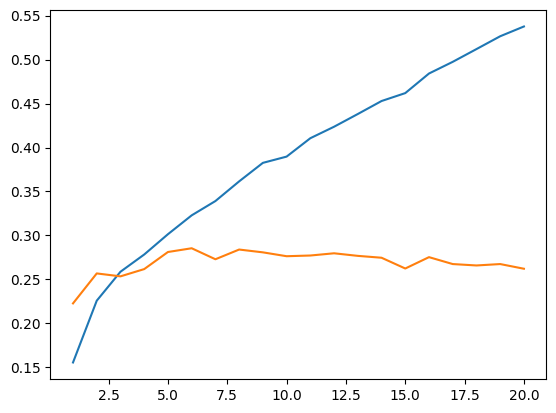

In [589]:
plt.plot([i for i in range(1,21)],history.history['accuracy'])
plt.plot([i for i in range(1,21)],history.history['val_accuracy'])
plt.show()

In [628]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ (32, 33, 200)          │     7,496,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_50                │ (32, 256)              │       253,440 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (32, 13)               │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,308,201 (31.69 MB)

 Trainable params: 270,733 (1.03 MB)

 Non-trainable params: 7,496,000 (28.59 MB)

 Optimizer params: 541,468 (2.07 MB)

In [ ]:
x_testt = tokenizer.texts_to_sequences(x_test.tolist())
x_testt = np.array(x_testt)

In [341]:
# now evaluate on y_test (unseen data) (metrics: accuracy,precision,recall,f1-score)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

y_pred = model.predict(x_testt)

248/248 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [357]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test_hot,axis=1)

In [363]:
acc = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test, average='weighted')
recall = recall_score(y_pred,y_test, average='weighted')
f1 = f1_score(y_pred,y_test,average='weighted')

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [364]:
acc,precision,recall,f1

(0.2891748675246026,
 0.3933474128762612,
 0.2891748675246026,
 0.32535759025265915)